In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
from matplotlib import dates
import matplotlib.pyplot as plt
import time
from pathlib import Path
from scipy.optimize import curve_fit
from tables import open_file

In [2]:
#ncsvf=!(ls ../scratch/simtel_data/gamma/npe/corsika_run*.npe.csv | wc -l)
ncsvf=!(ls ../scratch/simtel_data/proton/npe/corsika_run*.npe.csv | wc -l)
ncsvf=int((ncsvf[0]))
fname_list=['../scratch/simtel_data/proton/npe/corsika_run' + str(i) + '.npe.csv' for i in range(1,ncsvf+1)]
#fname_list=['../scratch/simtel_data/gamma/npe/corsika_run' + str(i) + '.npe.csv' for i in range(1,ncsvf+1)]
df_list=[pd.read_csv(fname) for fname in fname_list]
#df=pd.concat([pd.read_csv(fname) for fname in fname_list], ignore_index=True)
#
df=pd.concat(df_list, ignore_index=True)
n_sim_ev_per_file = 1000000.0
n_sim_ev = len(df_list)*n_sim_ev_per_file
print(n_sim_ev)
print(len(df_list))

284000000.0
284


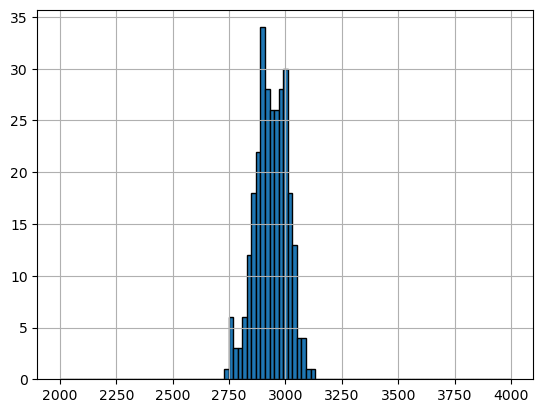

284


In [3]:
#plt.hist(np.array([len(dftmp) for dftmp in df_list]), bins=np.linspace(10000.0, 14000, num=100), edgecolor='black', alpha=1.0)
plt.hist(np.array([len(dftmp) for dftmp in df_list]), bins=np.linspace(2000.0, 4000, num=100), edgecolor='black', alpha=1.0)
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()
print(len(df_list))

In [4]:
np.mean(np.array([len(dftmp) for dftmp in df_list]))/n_sim_ev_per_file

0.0029346795774647886

In [5]:
len(df)/len(df_list)

2934.6795774647885

In [6]:
df

,Unnamed: 0,event_id,energy,azimuth,altitude,h_first_int,xmax,hmax,emax,cmax,...,L3_cl_channelID_LST3,L3_cl_timeID_LST3,L3_cl_n_digitalsum_points_LST4,L3_cl_n_clusters_LST4,L3_cl_n_points_LST4,L3_cl_x_mean_LST4,L3_cl_y_mean_LST4,L3_cl_t_mean_LST4,L3_cl_channelID_LST4,L3_cl_timeID_LST4
0,0,5200.0,0.115086,3.062638,1.218684,16199.321289,273.076935,10251.343750,273.333344,278.034241,...,-999.0,-999.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,1,5208.0,0.115086,3.062638,1.218684,16199.321289,273.076935,10251.343750,273.333344,278.034241,...,-999.0,-999.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,2,5504.0,1.123066,3.220341,1.271500,12663.388672,457.200012,6639.671875,461.428558,460.637756,...,-999.0,-999.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,3,6409.0,0.122709,2.996659,1.231897,17323.265625,294.000000,9758.931641,294.000000,328.353088,...,-999.0,-999.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,4,7604.0,0.230914,3.106559,1.238464,13307.477539,516.086975,5728.506348,516.956543,458.041138,...,-999.0,-999.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833444,2876,9975803.0,2.750368,3.022828,1.234984,12648.379883,426.000000,7160.139648,426.727264,441.308197,...,-999.0,-999.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0
833445,2877,9976401.0,0.185388,3.054684,1.182417,14090.978516,310.000000,9400.686523,318.571442,360.508606,...,-999.0,-999.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0
833446,2878,9985104.0,0.636200,3.331201,1.166782,19669.939453,351.904755,8526.277344,352.857147,358.027802,...,-999.0,-999.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0
833447,2879,9989903.0,0.302174,3.087859,1.135478,23442.761719,193.636368,12465.554688,125.609756,201.725616,...,-999.0,-999.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0


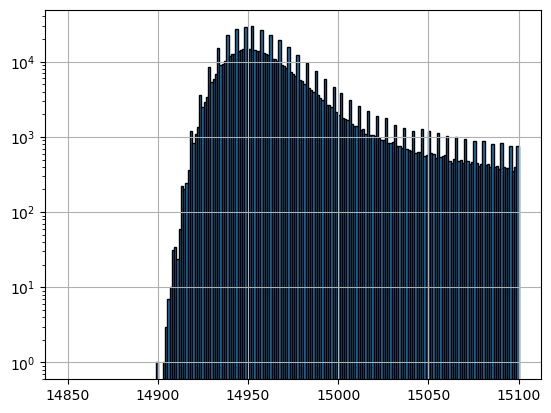

In [7]:
plt.hist(df['L1_max_digi_sum_LST1'].values, bins=np.linspace(14850, 15100, num=200), edgecolor='black', alpha=1.0)
#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)
#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()

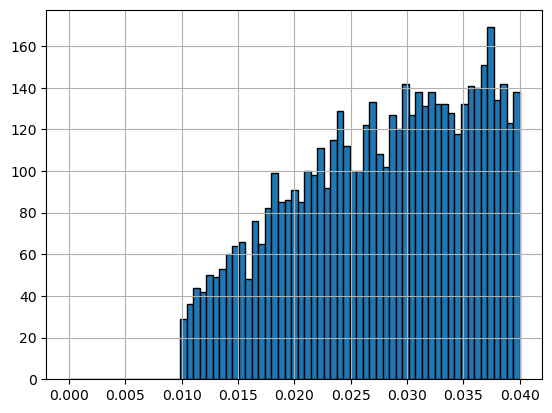

119513


In [8]:
#plt.hist(df['energy'].values, bins=np.linspace(0.0, 0.04, num=70), edgecolor='black', alpha=1.0)
#14963 and L3 n points is > 7
trg_l1=df[df['L1_max_digi_sum_LST1']>14963]
trg_l3=trg_l1[trg_l1['L3_iso_n_points_LST1']>7]
#trg_l3=trg_l3[trg_l3['L3_cl_n_points_LST1']>50]
#trg_l3=df[df['L3_iso_n_points_LST1']>6]
#plt.hist(df[df['L1_max_digi_sum_LST1']>14963]['energy'].values, bins=np.linspace(0.0, 0.04, num=70), edgecolor='black', alpha=1.0)
hist_trg3=plt.hist(trg_l3['energy'].values, bins=np.linspace(0.0, 0.04, num=70), edgecolor='black', alpha=1.0)
#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)
#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()
print(len(trg_l3))

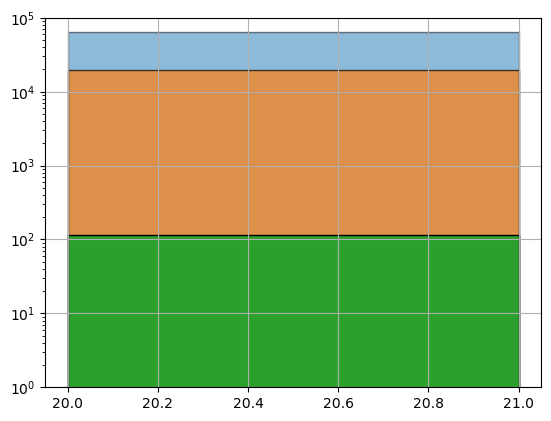

In [9]:
plt.hist(df['n_pe_LST1'].values, bins=np.linspace(20.0, 21, num=2), edgecolor='black', alpha=0.5)
plt.hist(trg_l1['n_pe_LST1'].values, bins=np.linspace(20.0, 21, num=2), edgecolor='black', alpha=0.7)
plt.hist(trg_l3['n_pe_LST1'].values, bins=np.linspace(20.0, 21, num=2), edgecolor='black', alpha=1.0)
#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)
#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.ylim(1.0, 1.0e+5)
# Show the plot
plt.show()

In [10]:
df_20pe=df[df['n_pe_LST1']==20]
trg_l3_20pe=trg_l3[trg_l3['n_pe_LST1']==20]

In [11]:
one_wf_time=75.0*1000.0/1024.0*1.0e-9
print(len(df_20pe))
print(len(trg_l3_20pe))
print(one_wf_time)

33841
55
7.324218750000001e-08


In [12]:
len(trg_l3_20pe)/(len(df_20pe)*one_wf_time)

22190.04560542931

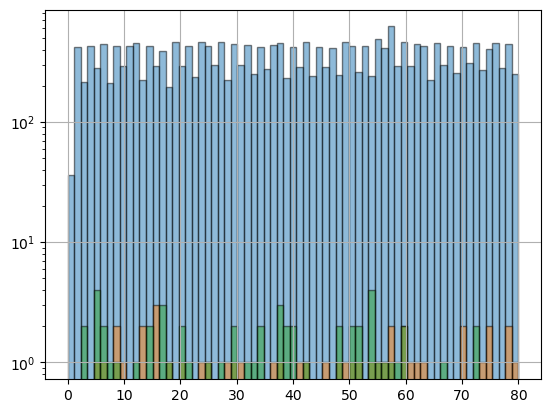

In [13]:
plt.hist(df_20pe['L3_iso_t_mean_LST1'].values*1.0/0.06, bins=np.linspace(0.0, 80, num=70), edgecolor='black', alpha=0.5)
plt.hist(trg_l3_20pe['L3_iso_t_mean_LST1'].values*1.0/0.06, bins=np.linspace(0.0, 80, num=70), edgecolor='black', alpha=0.5)
plt.hist(trg_l3_20pe['L3_cl_t_mean_LST1'].values*1.0/0.06, bins=np.linspace(0.0, 80, num=70), edgecolor='black', alpha=0.5)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
#plt.ylim(1.0, 1.0e+5)
# Show the plot
plt.show()


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 2.,
        3., 3., 2., 2., 2., 1., 2., 0., 2., 3., 4., 2., 2., 2., 3., 1., 2.,
        1., 1., 0., 2., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([-80.        , -78.38383838, -76.76767677, -75.15151515,
        -73.53535354, -71.91919192, -70.3030303 , -68.68686869,
        -67.07070707, -65.45454545, -63.83838384, -62.22222222,
        -60.60606061, -58.98989899, -57.37373737, -55.75757576,
        -54.14141414, -52.52525253, -50.90909091, -49.29292929,
        -47.67676768, -46.06060606, -44.44444444, -42.82828283,
        -41.21212121, -39.5959596 , -37.97979798, -36.36363636,
        -34.74747475, -33.13131313, -31.51515152, -29.8989899 ,
        -28.28282828, -26.66666667, -25.05

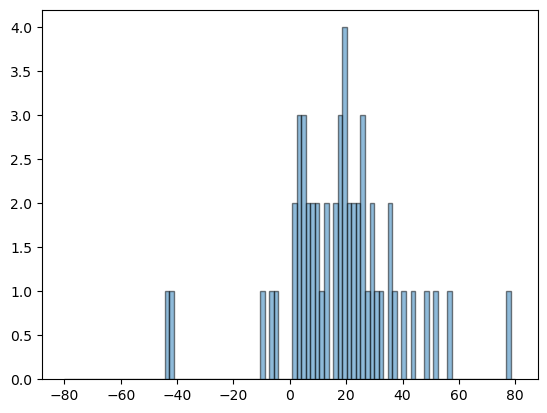

In [14]:
plt.hist((trg_l3_20pe['L3_iso_t_mean_LST1'].values - trg_l3_20pe['L3_cl_t_mean_LST1'].values)*1.0/0.06, bins=np.linspace(-80.0, 80, num=100), edgecolor='black', alpha=0.5)


In [15]:
print(len(trg_l1))
print(len(trg_l3))
len(trg_l3)/len(trg_l1)

397712
119513


0.30050136782395304

### Observations of the Crab Nebula and Pulsar with the Large-Sized Telescope Prototype of the Cherenkov Telescope Array

<div>
<img src="LST_crab_sim.png" width="800"/>
</div>

# (Crab like spectrum from : Aleksić et al. (2015))

### Measurement of the Crab Nebula spectrum over three decades in energy with the MAGIC telescopes


https://arxiv.org/pdf/1406.6892

<div>
<img src="crab_magic.png" width="800"/>
</div>

Text(0, 0.5, '')

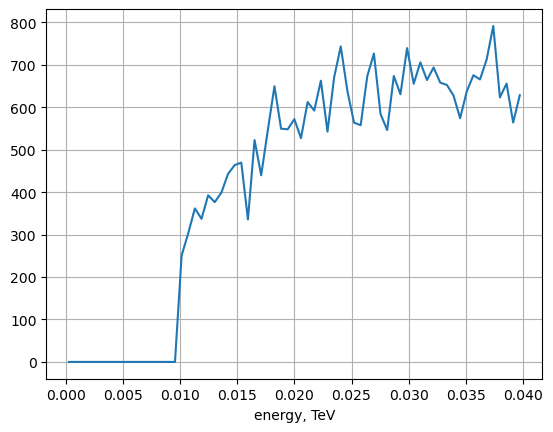

In [16]:
E_trg3 = [ (hist_trg3[1][i] + hist_trg3[1][i-1])/2.0 for i in range(1,len(hist_trg3[1]))]
N_trg3 = hist_trg3[0]
#corrector=1.0/np.power(E_trg3,0.21)
corrector=1.0/np.power(E_trg3,0.47)
#plt.grid(True)
plt.plot(E_trg3,N_trg3*corrector)
plt.grid(True)
plt.xlabel('energy, TeV')
plt.ylabel('')

Text(0, 0.5, '')

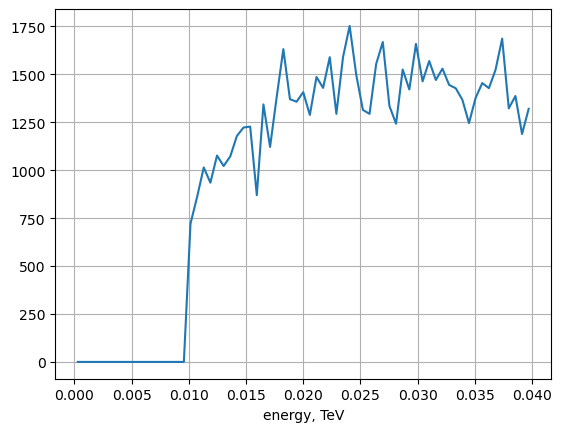

In [17]:
E_trg3 = [ (hist_trg3[1][i] + hist_trg3[1][i-1])/2.0 for i in range(1,len(hist_trg3[1]))]
N_trg3 = hist_trg3[0]
#corrector=1.0/np.power(E_trg3,0.21)
corrector=1.0/np.power(E_trg3,0.7)
#plt.grid(True)
plt.plot(E_trg3,N_trg3*corrector)
plt.grid(True)
plt.xlabel('energy, TeV')
plt.ylabel('')

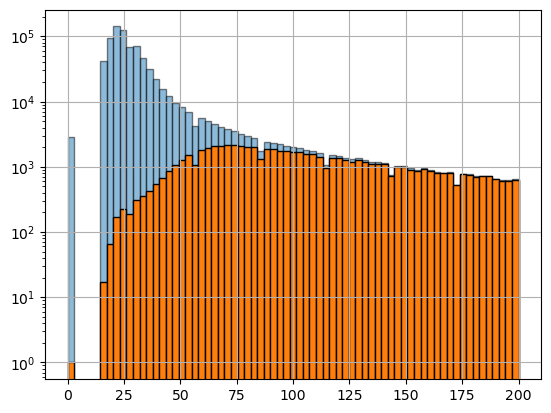

In [18]:
plt.hist(df['L3_cl_n_points_LST1'].values, bins=np.linspace(0.0, 200, num=70), edgecolor='black', alpha=0.5)
plt.hist(trg_l3['L3_cl_n_points_LST1'].values, bins=np.linspace(0.0, 200, num=70), edgecolor='black', alpha=1.0)
#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)
#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()

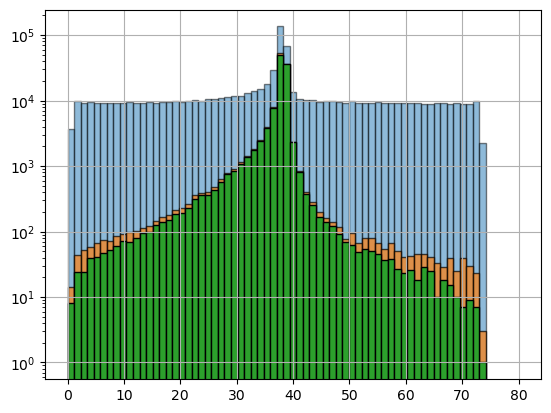

In [19]:
plt.hist(df['L3_cl_t_mean_LST1'].values*1.0/0.06, bins=np.linspace(0.0, 80, num=70), edgecolor='black', alpha=0.5)
plt.hist(trg_l3['L3_cl_t_mean_LST1'].values*1.0/0.06, bins=np.linspace(0.0, 80, num=70), edgecolor='black', alpha=0.7)
trg_l3_cl=trg_l3[trg_l3['L3_cl_n_points_LST1']>50]
plt.hist(trg_l3_cl['L3_cl_t_mean_LST1'].values*1.0/0.06, bins=np.linspace(0.0, 80, num=70), edgecolor='black', alpha=1.0)
#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)
#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()

(array([ 2836.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,  8715., 33073., 22726., 72161., 47827., 93852.,
        43261., 81218., 36164., 31864., 49654., 20259., 33145., 13626.,
        22479.,  9285., 15327.,  6481., 10877.,  4792.,  4253.,  7725.,
         3551.,  6062.,  2929.,  5257.,  2398.,  4551.,  2148.,  2048.,
         3897.,  1798.,  3425.,  1645.,  3033.,  1421.,  2768.,  1299.,
         2616.,  1225.,  1222.,  2291.,  1093.,  2082.,   990.,  2014.,
          936.,  1862.,   913.,   826.,  1649.,   783.,  1598.,   748.,
         1468.,   750.,  1420.,   683.,  1352.]),
 array([  0.        ,   1.44927536,   2.89855072,   4.34782609,
          5.79710145,   7.24637681,   8.69565217,  10.14492754,
         11.5942029 ,  13.04347826,  14.49275362,  15.94202899,
         17.39130435,  18.84057971,  20.28985507,  21.73913043,
         23.1884058 ,  24.63768116,  26.08695652,  27.53623188,
         28.98550725,  30.43478261,  31.88405797,  33.

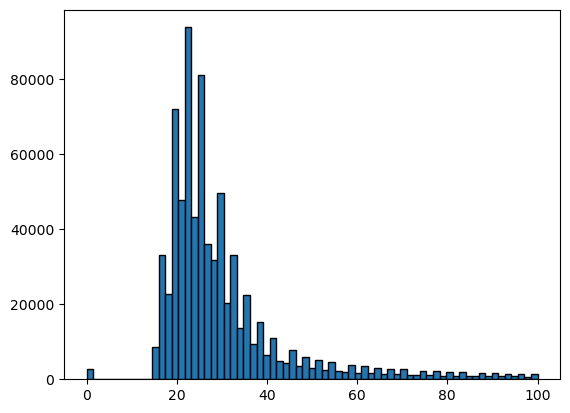

In [20]:
plt.hist(df['L3_cl_n_points_LST1'].values, bins=np.linspace(0.0, 100, num=70), edgecolor='black', alpha=1.0)

In [21]:
#0.025
#0.040
#0.064
#0.1
#0.16
#0.25
#0.40
#0.65
#1.00
#1.60
#2.54
#4.07
#6.44
#10.0
#15.9
np.logspace(np.log10(0.02),np.log10(20.0),16)

array([ 0.02      ,  0.03169786,  0.05023773,  0.07962143,  0.12619147,
        0.2       ,  0.31697864,  0.50237729,  0.79621434,  1.26191469,
        2.        ,  3.16978638,  5.02377286,  7.96214341, 12.61914689,
       20.        ])

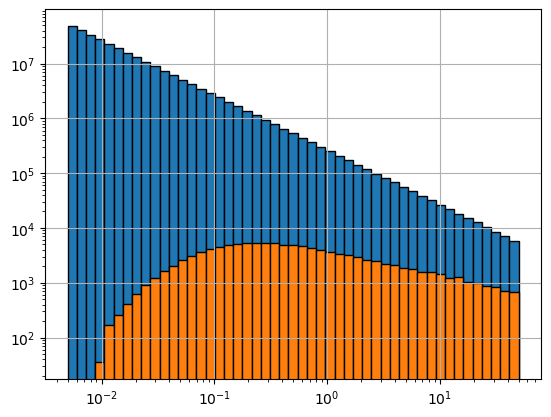

In [22]:
hist_sim=plt.hist(1.0/np.random.uniform(1.0/50,1.0/0.005,int(n_sim_ev)), bins=np.logspace(np.log10(0.005),np.log10(50),50), edgecolor='black', alpha=1.0)
hist_trg3=plt.hist(trg_l3['energy'].values, bins=np.logspace(np.log10(0.005),np.log10(50),50), edgecolor='black', alpha=1.0)
#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)
#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xscale('log')  # Set y-axis to logarithmic scale
#plt.xlim(0.0, 0.05)
plt.grid(True)
# Show the plot
plt.show()

In [23]:
df_LST_sim = pd.DataFrame({
    'energy': (hist_sim[1][:-1] + hist_sim[1][1:])/2.0,
    'nev': hist_sim[0]
})
df_LST_trg = pd.DataFrame({
    'energy': (hist_trg3[1][:-1] + hist_trg3[1][1:])/2.0,
    'nev': hist_trg3[0]
})
#zip((hist_sim[1][:-1] + hist_sim[1][1:])/2.0,hist_sim[0])

In [24]:
df_LST_sim.to_csv('LST_AdvCam_Zenith_20.00deg_sim.csv', index=False, header=False, sep=' ')
df_LST_trg.to_csv('LST_AdvCam_Zenith_20.00deg_trg.csv', index=False, header=False, sep=' ')

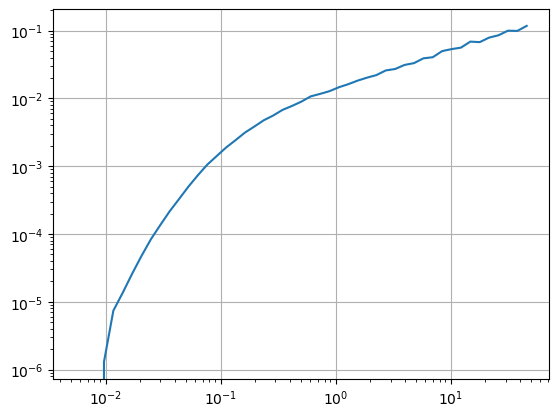

In [25]:
histeff=plt.plot((hist_sim[1][1:] + hist_sim[1][:-1])/2.0,hist_trg3[0]/hist_sim[0])
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xscale('log')  # Set y-axis to logarithmic scale
#plt.xlim(0.0, 0.05)
plt.grid(True)
# Show the plot
plt.show()

In [26]:
print(hist_sim[1][:-1])
print(hist_trg3[0]/hist_sim[0])

[5.00000000e-03 6.03396320e-03 7.28174239e-03 8.78755312e-03
 1.06047544e-02 1.27977396e-02 1.54442180e-02 1.86379686e-02
 2.24921633e-02 2.71433772e-02 3.27564278e-02 3.95302161e-02
 4.77047738e-02 5.75697700e-02 6.94747747e-02 8.38416468e-02
 1.01179482e-01 1.22102655e-01 1.47352585e-01 1.77824015e-01
 2.14596713e-01 2.58973734e-01 3.12527596e-01 3.77156003e-01
 4.55149089e-01 5.49270571e-01 6.62855683e-01 7.99929360e-01
 9.65348864e-01 1.16497591e+00 1.40588435e+00 1.69661089e+00
 2.04745753e+00 2.47085668e+00 2.98181166e+00 3.59842837e+00
 4.34255687e+00 5.24056567e+00 6.32427608e+00 7.63208984e+00
 9.21034985e+00 1.11149824e+01 1.34134790e+01 1.61872877e+01
 1.95346997e+01 2.35743318e+01 2.84493301e+01 3.43324423e+01
 4.14321386e+01]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.29988423e-06
 7.40788706e-06 1.36191375e-05 2.59646255e-05 4.76244255e-05
 8.38676777e-05 1.35831230e-04 2.16939661e-04 3.29079395e-04
 5.01396832e-04 7.37109051e-04 1.05440026e-03 1.41192073e-03
 1.8851

In [27]:
len(hist_sim[1][:-1])
len(hist_sim[0])

49

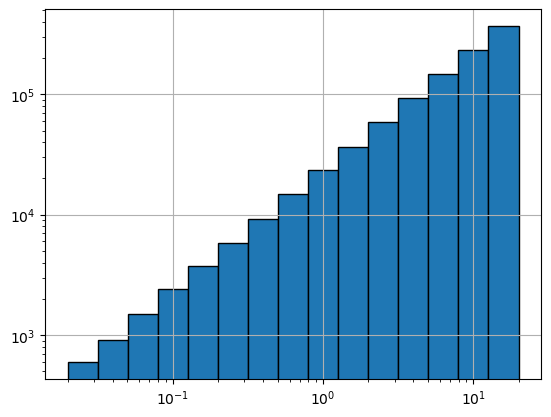

In [28]:
thehist=plt.hist(np.random.uniform(0.02,20,1000000), bins=np.logspace(np.log10(0.02),np.log10(20.0),16), edgecolor='black', alpha=1.0)
#plt.hist(np.random.uniform(0.02,20,10000), bins=np.linspace(0.02,20,16), edgecolor='black', alpha=1.0)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [29]:
thehist

(array([   598.,    916.,   1503.,   2433.,   3724.,   5808.,   9266.,
         14730.,  23473.,  36619.,  58550.,  92436., 146913., 232914.,
        370117.]),
 array([ 0.02      ,  0.03169786,  0.05023773,  0.07962143,  0.12619147,
         0.2       ,  0.31697864,  0.50237729,  0.79621434,  1.26191469,
         2.        ,  3.16978638,  5.02377286,  7.96214341, 12.61914689,
        20.        ]),
 <BarContainer object of 15 artists>)

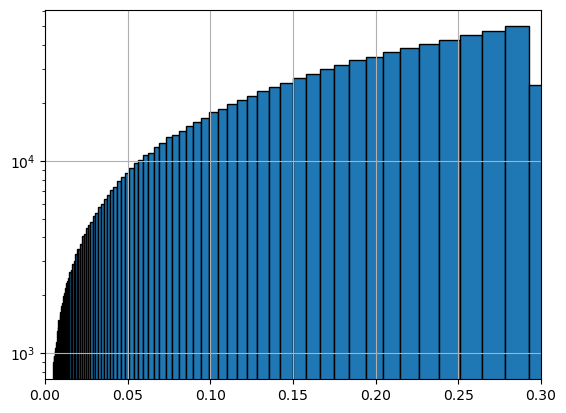

In [30]:
thehist=plt.hist(np.random.uniform(0.005,0.3,1000000), bins=np.logspace(np.log10(0.005),np.log10(20),162), edgecolor='black', alpha=1.0)
#plt.hist(np.random.uniform(0.02,20,10000), bins=np.linspace(0.02,20,16), edgecolor='black', alpha=1.0)
plt.yscale('log')  # Set y-axis to logarithmic scale
#plt.xscale('log')  # Set y-axis to logarithmic scale
plt.xlim(0,0.3)
plt.grid(True)
plt.show()

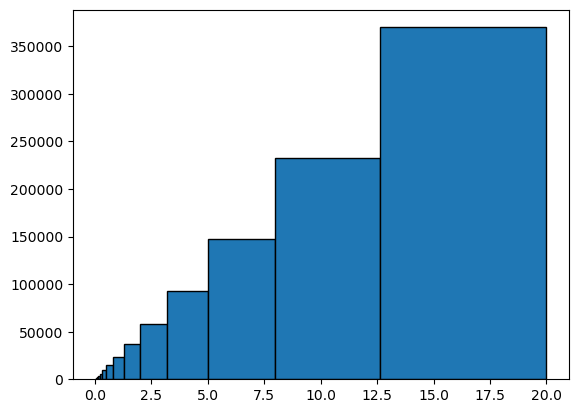

In [31]:
thehist=plt.hist(np.random.uniform(0.02,20,1000000), bins=np.logspace(np.log10(0.02),np.log10(20.0),16), edgecolor='black', alpha=1.0)

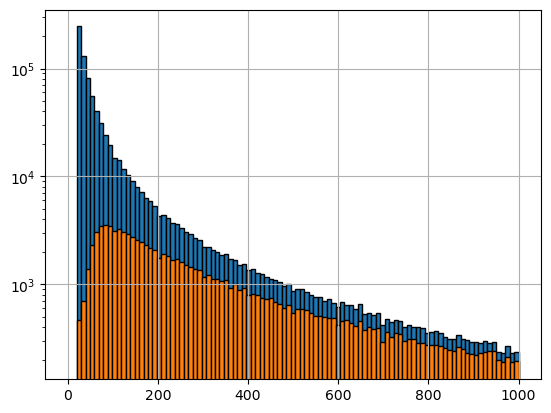

In [32]:
plt.hist(df['n_pe_LST1'].values, bins=np.linspace(0.0, 1000, num=102), edgecolor='black', alpha=1.0)
plt.hist(trg_l3['n_pe_LST1'].values, bins=np.linspace(0.0, 1000, num=102), edgecolor='black', alpha=1.0)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()

In [33]:
trg_l3['n_pe_LST1']

2         560.0
6         255.0
11        773.0
17        363.0
18         69.0
          ...  
833403    455.0
833411    161.0
833417     68.0
833419    164.0
833436     90.0
Name: n_pe_LST1, Length: 119513, dtype: float64

In [34]:
plt.hist(df_p['L3_cl_n_points_LST1'].values, bins=np.linspace(-1.50, 200, num=100), edgecolor='black', alpha=1.0)
plt.hist(df_g['L3_cl_n_points_LST1'].values, bins=np.linspace(-1.50, 200, num=100), edgecolor='black', alpha=0.1)
#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)
#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()

NameError: name 'df_p' is not defined

In [ ]:
plt.hist(df_g['energy'].values, bins=np.linspace(0.0, 0.12, num=70), edgecolor='black', alpha=1.0)
trg_l1=df_g[df_g['L1_max_digi_sum_LST1']>14977]
trg_l3=trg_l1[trg_l1['L3_iso_n_points_LST1']>7]
plt.hist(df_g[df_g['L1_max_digi_sum_LST1']>14977]['energy'].values, bins=np.linspace(0.0, 0.12, num=70), edgecolor='black', alpha=1.0)
plt.hist(trg_l3['energy'].values, bins=np.linspace(0.0, 0.12, num=70), edgecolor='black', alpha=1.0)
#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)
#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()

In [ ]:
len(df_g['energy'].values)

In [ ]:
plt.hist(df_p[df_p['n_pe_LST2']==20]['n_pe_LST2'].values, bins=np.linspace(-1.50, 200, num=100), edgecolor='black', alpha=1.0)
#trg_l1=df_g[df_g['L1_max_digi_sum_LST1']>14977]
#trg_l3=trg_l1[trg_l1['L3_iso_n_points_LST1']>5]
#plt.hist(df_g[df_g['L1_max_digi_sum_LST1']>14977]['energy'].values, bins=np.linspace(0.0, 0.05, num=70), edgecolor='black', alpha=1.0)
#plt.hist(trg_l3['energy'].values, bins=np.linspace(0.0, 0.05, num=70), edgecolor='black', alpha=1.0)
#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)
#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()

In [ ]:
plt.hist(df_300kHz['L1_max_digi_sum_LST1'].values, bins=np.linspace(14750, 15100, num=100), edgecolor='black', alpha=1.0)
plt.hist(df_268MHz['L1_max_digi_sum_LST1'].values, bins=np.linspace(14750, 15100, num=100), edgecolor='black', alpha=0.5)
#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)
#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()

In [ ]:
plt.hist(df_300kHz['L3_cl_n_points_LST1'].values, bins=np.linspace(-2.5, 100.0, num=30), edgecolor='black', alpha=1.0)
plt.hist(df_268MHz['L3_cl_n_points_LST1'].values, bins=np.linspace(-2.5, 100.0, num=30), edgecolor='black', alpha=0.3)
#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)
#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()

In [ ]:
#plt.scatter(x=df_300kHz['L3_iso_n_points_LST1'].values,y=df_300kHz['L1_max_digi_sum_LST1'].values, edgecolor='black', alpha=1.0)
plt.scatter(x=df_268MHz['L3_iso_n_points_LST1'].values,y=df_268MHz['L1_max_digi_sum_LST1'].values, edgecolor='black', alpha=0.3)
#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)
#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()

In [ ]:
plt.hist(df_300kHz['L1_t_mean_LST1'].values, bins=np.linspace(0, 80, num=45), edgecolor='black', alpha=1.0)
plt.hist(df_268MHz['L1_t_mean_LST1'].values, bins=np.linspace(0, 80, num=45), edgecolor='black', alpha=0.5)
#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)
#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()

In [ ]:
plt.hist(df_268MHz['L1_t_mean_LST1'].values, bins=np.linspace(0, 80, num=45), edgecolor='black', alpha=0.7)
plt.hist(df_268MHz[df_268MHz['L1_max_digi_sum_LST1']>15000]['L1_t_mean_LST1'].values, bins=np.linspace(0, 80, num=45), edgecolor='black', alpha=1.0)
#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)
#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()

In [ ]:
plt.hist(df_300kHz['L3_iso_t_mean_LST1'].values/0.09, bins=np.linspace(-10, 100, num=100), edgecolor='black', alpha=0.7)
plt.hist(df_268MHz['L3_iso_t_mean_LST1'].values/0.09, bins=np.linspace(-10, 100, num=100), edgecolor='black', alpha=0.1)
#
#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)
#
#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()

In [ ]:
np.unique(df_268MHz['L3_cl_timeID_LST1'].values)

In [ ]:
#plt.hist(df_300kHz['L3_iso_t_mean_LST1'].values/0.09, bins=np.linspace(-10, 100, num=100), edgecolor='black', alpha=0.7)
plt.hist(df_268MHz['L3_cl_x_mean_LST1'].values, bins=np.linspace(-3, 3, num=100), edgecolor='black', alpha=0.1)
#
#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)
#
#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()

In [ ]:
plt.hist(df[df['n_points']>40]['energy'].values, bins=np.linspace(0, 0.1, num=100), edgecolor='black')

#df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)

#plt.xlabel('energy, TeV')
#plt.ylabel('')
#plt.title('energy')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()

In [ ]:
plt.hist(df_nsb['energy'].values, bins=np.linspace(0, 0.04, num=100), edgecolor='black')
plt.hist(df_gd['energy'].values, bins=np.linspace(0, 0.04, num=100), edgecolor='black')
#plt.hist(df_g['energy'].values, bins=np.linspace(0, 0.04, num=100), edgecolor='black')
#plt.hist(df_e['energy'].values, bins=np.linspace(0, 0.1, num=100), edgecolor='black')
#plt.hist(df_p['energy'].values, bins=np.linspace(0, 0.1, num=100), edgecolor='black')
# Add labels and title
plt.xlabel('energy, TeV')
plt.ylabel('')
plt.title('energy')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
# Show the plot
plt.show()

In [ ]:
len(df_nsb[df_nsb['n_pe']>0])/(len(df_nsb['n_pe']))

In [ ]:
df_g_t=df_g[df_g['timeID']>=0]

In [ ]:
df_g_t

In [ ]:
len(df_g_t)

In [ ]:
df_g_t[df_g_t['n_pe']>10]['energy'].hist(bins=100,grid=True)

In [ ]:
df_nsb_=df_nsb[df_nsb['n_pe']==0].copy()

In [ ]:
len(df_nsb_)

In [ ]:
df_nsb_['digitalsum_points_rate']=df_nsb_['n_digitalsum_points']/(1000.0/fadc_MHz*fadc_sum_bins*1e-9)/1e9

In [ ]:
np.mean(df_nsb_['digitalsum_points_rate'].values)

In [ ]:
fig, ax00 = plt.subplots(figsize=(7,7))

df_nsb_['n_digitalsum_points'].hist(ax = ax00,bins=np.linspace(0,1000,100), alpha=0.7, color='b', edgecolor='black', density=False);
#ax00.set(xlabel='Digital sum micro-cluster rate, GHz', ylabel='');
#
ax00.yaxis.grid(True)
ax00.xaxis.grid(True)
#ax00.set_yscale('log')

#ax00.set_xlim(2,14)
#ax00.set_ylim(1,2*1e+5)


# Add mean and std annotations
#plt.axvline(np.mean(df_nsb_['digitalsum_points_rate']), color='r', linestyle='dashed', linewidth=2)
#plt.text(12.0, 2.2e+4, f'Mean: {np.mean(df_nsb_['digitalsum_points_rate']):.2f} GHz', color='k')

# Add mean and std annotations
#plt.axvline(np.mean(df_nsb_['digitalsum_points_rate']) + 2*np.std(df_nsb_['digitalsum_points_rate']), 
#            color='k', linestyle='dashed', linewidth=2)
#plt.axvline(np.mean(df_nsb_['digitalsum_points_rate']) - 2*np.std(df_nsb_['digitalsum_points_rate']), 
#            color='k', linestyle='dashed', linewidth=2)
#plt.text(12.0, 1.2e+4, f'Std: {np.std(df_nsb_['digitalsum_points_rate']):.2f} GHz', color='k')

In [ ]:
fig, ax01 = plt.subplots(figsize=(7,7))

df_nsb_['digitalsum_points_rate'].hist(ax = ax01,bins=np.linspace(0,15,100), alpha=0.7, color='b', edgecolor='black', density=False);
ax01.set(xlabel='Digital sum micro-cluster rate, GHz', ylabel='');
#
ax01.yaxis.grid(True)
ax01.xaxis.grid(True)
ax01.set_yscale('log')

ax01.set_xlim(2,14)
#ax01.set_ylim(1,2*1e+5)


# Add mean and std annotations
plt.axvline(np.mean(df_nsb_['digitalsum_points_rate']), color='r', linestyle='dashed', linewidth=2)
plt.text(12.0, 2.2e+4, f'Mean: {np.mean(df_nsb_['digitalsum_points_rate']):.2f} GHz', color='k')

# Add mean and std annotations
plt.axvline(np.mean(df_nsb_['digitalsum_points_rate']) + 2*np.std(df_nsb_['digitalsum_points_rate']), 
            color='k', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(df_nsb_['digitalsum_points_rate']) - 2*np.std(df_nsb_['digitalsum_points_rate']), 
            color='k', linestyle='dashed', linewidth=2)
plt.text(12.0, 1.2e+4, f'Std: {np.std(df_nsb_['digitalsum_points_rate']):.2f} GHz', color='k')

In [ ]:
fig, ax02 = plt.subplots(figsize=(7,7))

df_nsb_['n_points'].hist(ax = ax02,bins=np.linspace(0,150,150), alpha=0.7, color='b', edgecolor='black', density=False);
df_g['n_points'].hist(ax = ax02,bins=np.linspace(0,150,150), alpha=0.3, color='r', edgecolor='black', density=False);
df_gd['n_points'].hist(ax = ax02,bins=np.linspace(0,150,150), alpha=0.3, color='g', edgecolor='black', density=False);
df_e['n_points'].hist(ax = ax02,bins=np.linspace(0,150,150), alpha=0.3, color='m', edgecolor='black', density=False);
df_p['n_points'].hist(ax = ax02,bins=np.linspace(0,150,150), alpha=0.2, color='k', edgecolor='black', density=False);

#
ax02.yaxis.grid(True)
ax02.xaxis.grid(True)
ax02.set_yscale('log')

In [ ]:
rate_vs_th=[len(df_nsb_[df_nsb_['n_points']>=i])/len(df_nsb_['n_points'])*1.0/(1000.0/1024*75*1.0e-9) for i in np.arange(1,70)]

In [ ]:
np.array(rate_vs_th)<30000

In [ ]:
fig, ax03 = plt.subplots(figsize=(7,7))

#plt.plot(rate_vs_th,ax = ax03, alpha=0.7, color='b', density=False)
#ax03.scatter(np.arange(len(rate_vs_th)), rate_vs_th, c='r', lw =2, ls="-")
#ax03.plot(rate_vs_th, 'o-', c='k', lw =2, ls="-",mfc='red', mec='k')
ax03.plot(rate_vs_th, 'o-', c='k', lw =2, mfc='red', mec='k')
#
ax03.yaxis.grid(True)
ax03.xaxis.grid(True)
ax03.set_yscale('log')
#
plt.hlines(30000.0,0,34, color='g', linestyle='-.', linewidth=2, label='30 kHz rate')
plt.vlines(34,1,30000.0, color='g', linestyle='--', linewidth=2, label='threshold')
#
plt.legend()
#plt.title("sdsdsd: "r'$\mu$')
plt.title('NSB at 386 MHz')
#
ax03.set(xlabel='Number of points in the DBSCAN cluster', ylabel='Rete, Hz')

In [ ]:
1.0/(1000.0/1024*75*1.0e-9)

In [ ]:
df_nsb_[df_nsb_['t_mean']>0]['t_mean'].hist(bins=30)

In [ ]:
df_nsb_['n_points'].hist(bins=100)

In [ ]:
fig, ax04 = plt.subplots(figsize=(12,5))

df_nsb_['n_points'].hist(ax = ax04,bins=100);
ax04.set(xlabel='',ylabel='Occupancy');
#
ax04.yaxis.grid(True)
ax04.xaxis.grid(True)
ax04.set_yscale('log')

In [ ]:
len(df_p[df_p['n_pe']>30])/71.0/1000000.0*get_proton_flux_pers( E_proton_min, E_proton_max, theta_proton_min_deg, theta_proton_max_deg, R_proton)

In [ ]:
fig, ax05 = plt.subplots(figsize=(7,7))

#plt.plot(rate_vs_th,ax = ax03, alpha=0.7, color='b', density=False)
#ax03.scatter(np.arange(len(rate_vs_th)), rate_vs_th, c='r', lw =2, ls="-")
#ax03.plot(rate_vs_th, 'o-', c='k', lw =2, ls="-",mfc='red', mec='k')
#ax05.hist(df_nsb['energy']*1000,bins=np.logspace(1, 5, num=21))
ax05.hist(df_nsb['energy']*1000,bins=np.logspace(1, 5, num=50),color='r', alpha=0.3)
ax05.hist(generate_random_1_over_x_squared(len(df_nsb), 10, 100000),bins=np.logspace(1, 5, num=50),color='b', alpha=0.3)
#
ax05.yaxis.grid(True)
ax05.xaxis.grid(True)
ax05.set_yscale('log')
ax05.set_xscale('log')
ax05.set_xlim(9,110000)
ax05.set_ylim(1,2*1e+5)
#
#plt.hlines(30000.0,0,34, color='g', linestyle='-.', linewidth=2, label='30 kHz rate')
#plt.vlines(34,1,30000.0, color='g', linestyle='--', linewidth=2, label='threshold')
#
#plt.legend()
#plt.title("sdsdsd: "r'$\mu$')
#plt.title('NSB at 386 MHz')
#
ax05.set(xlabel='E, GeV', ylabel='')

In [ ]:
fig, ax06 = plt.subplots(figsize=(7,7))
#
ax06.hist(generate_random_1_over_x_squared(len(df_nsb)*100, 10, 100000),bins=np.logspace(1, 5, num=50),color='r', alpha=0.3)
#
ax06.yaxis.grid(True)
ax06.xaxis.grid(True)
ax06.set_yscale('log')
ax06.set_xscale('log')
ax06.set_xlim(9,110000)
ax06.set_ylim(1,2*1e+7)
#
ax06.set(xlabel='E, GeV', ylabel='')

In [ ]:
np.logspace(1, 5, num=21)[:-1].reshape(4,5)

In [ ]:
len(df_nsb)

In [ ]:
np.sqrt(1.0/(np.random.uniform(1/10, 1/100000, len(df_nsb))))

In [ ]:
1/10

In [ ]:
print(range(5))

In [ ]:
plt.hist(np.random.normal( 10, 1, 100),bins=np.linspace(0,20,30))

In [ ]:
data_raw=np.random.normal( 10, 1, 100)

In [ ]:
data=plt.hist(data_raw,bins=np.linspace(7,13,30))

In [ ]:
len(data[0])

In [ ]:
def gauss(x, ampl, mean, sigma):
    p = [ampl, mean, sigma]
    return p[0]* np.exp(-((x-p[1])**2/(2*p[2]**2)))

In [ ]:
p0 = [20., 10., 1.0]

In [ ]:
fit1, tmp1 = curve_fit(gauss, xdata=data[1][:-1], ydata=data[0], p0=p0)

In [ ]:
plt.plot(data[1][:-1], data[0], label='data')
plt.plot(data[1][:-1], gauss(data[1][:-1], *fit1), 'r--', label='fit')

plt.legend()

In [ ]:
tmp1

In [ ]:
(np.sqrt(1.00190752)/np.sqrt(1000))/np.sqrt(1.72175963e-03)

In [ ]:
fit1

In [ ]:
np.sqrt(1.05098153e-03)

In [ ]:
np.std(data_raw)/np.sqrt(1000)

In [ ]:
np.sqrt(tmp1[1,1])/(np.std(data_raw)/np.sqrt(100))

In [ ]:
fig, ax07 = plt.subplots(figsize=(7,7))

ax07.hist(df_p['energy']*1000,bins=np.logspace(1, 5, num=50),color='r', alpha=0.3)
#
ax07.yaxis.grid(True)
ax07.xaxis.grid(True)
ax07.set_yscale('log')
ax07.set_xscale('log')
ax07.set_xlim(9,110000)
ax07.set_ylim(1,2*1e+5)
#
ax07.set(xlabel='E, GeV', ylabel='')

In [ ]:
fig, ax08 = plt.subplots(figsize=(7,7))

#ax08.hist(df_g['energy']*1000,bins=np.logspace(0, 5, num=50),color='r', alpha=0.3)
ax08.hist(df_g[df_g['n_points']>36]['energy']*1000,bins=np.logspace(0, 5, num=100),color='b', alpha=0.3)
#
ax08.yaxis.grid(True)
ax08.xaxis.grid(True)
#ax08.set_yscale('log')
#ax08.set_xscale('log')
#ax08.set_xlim(9,110000)
ax08.set_xlim(9,40)
#ax08.set_ylim(1,2*1e+5)
#
ax08.set(xlabel='E, GeV', ylabel='')

In [ ]:
len(df_p)/71/1e+6

In [ ]:
fig, ax09 = plt.subplots(figsize=(7,7))
#
hist_p_info=ax09.hist(df_p[df_p['n_pe']>=30]['energy']*1000,bins=np.logspace(1, 5, num=50),color='r', alpha=0.5)
hist_p_all_info=ax09.hist(generate_random_1_over_x_squared(int(71*1e+6), 10, 100000),bins=np.logspace(1, 5, num=50),color='b', alpha=0.3)
#
ax09.yaxis.grid(True)
ax09.xaxis.grid(True)
ax09.set_yscale('log')
ax09.set_xscale('log')
#ax08.set_xlim(9,110000)
#ax08.set_xlim(9,100)
#ax08.set_ylim(1,2*1e+5)
#
ax09.set(xlabel='E, GeV', ylabel='')

In [ ]:
get_bin_centers(hist_p_info)

In [ ]:
#fig, ax10 = plt.subplots(figsize=(7,7))
#
#hist_p_info=ax10.hist(df_p['energy']*1000,bins=np.logspace(1, 5, num=50),color='r', alpha=0.5)
#hist_p_all_info=ax10.hist(generate_random_1_over_x_squared(int(71*1e+6), 10, 100000),bins=np.logspace(1, 5, num=50),color='b', alpha=0.3)
#
#ax10.yaxis.grid(True)
#ax10.xaxis.grid(True)
#ax10.set_yscale('log')
#ax10.set_xscale('log')
#ax08.set_xlim(9,110000)
#ax10.set_xlim(9,100)
#ax08.set_ylim(1,2*1e+5)
#
#ax10.set(xlabel='E, GeV', ylabel='')
#for c in get_bin_centers(hist_p_info):
#    plt.vlines(c,1,30000.0, color='g', linestyle='--', linewidth=2, label='threshold')

In [ ]:
fig, ax11 = plt.subplots(figsize=(7,7))

#ax11.plot(get_bin_centers(hist_p_info),hist_p_info[0]/hist_p_all_info[0], c='r', lw = 2, ls="-")
ax11.plot(get_bin_centers(hist_p_info),hist_p_info[0]/hist_p_all_info[0], 'o-', c='k', lw =2, mfc='red', mec='k')
#
ax11.yaxis.grid(True)
ax11.xaxis.grid(True)
ax11.set_yscale('log')
ax11.set_xscale('log')
#
#plt.hlines(30000.0,0,34, color='g', linestyle='-.', linewidth=2, label='30 kHz rate')
#plt.vlines(34,1,30000.0, color='g', linestyle='--', linewidth=2, label='threshold')
#
#plt.legend()
#plt.title("sdsdsd: "r'$\mu$')
#plt.title('NSB at 386 MHz')
#
#ax03.set(xlabel='Number of points in the DBSCAN cluster', ylabel='Rete, Hz')

In [ ]:
np.sum(hist_p_info[0]/hist_p_all_info[0])

In [ ]:
print(get_bin_min_max(hist_p_info)[:,1])

In [ ]:
print(len(hist_p_info[1][:-1]))
print(len(hist_p_info[1][1:]))

In [ ]:
np.roll(np.pad(hist_p_info[1],1),1)

In [ ]:
np.sum(get_proton_flux_pers(get_bin_min_max(hist_p_info)[:,0], get_bin_min_max(hist_p_info)[:,1], 
                            np.zeros(len(get_bin_min_max(hist_p_info)[:,1])), np.ones(len(get_bin_min_max(hist_p_info)[:,1]))*10, 
                            np.ones(len(get_bin_min_max(hist_p_info)[:,1]))*1500)*hist_p_info[0]/hist_p_all_info[0])

In [ ]:
get_proton_flux_pers( 10, 100000, 0, 10, 1500)

In [ ]:
e_min_max=get_bin_min_max(hist_p_info)
for i in np.arange(len(e_min_max)):
    emin=e_min_max[i,0]
    emax=e_min_max[i,1]
    print(emin)

In [ ]:
len(get_bin_min_max(hist_p_info)[:,1])

In [ ]:
np.zeros(len(get_bin_min_max(hist_p_info)[:,1]))

In [ ]:
np.ones(len(get_bin_min_max(hist_p_info)[:,1]))*10

In [ ]:
n_points_cut = np.arange(15,200,1)

In [ ]:
hist_data_proton=[ax09.hist(df_p[df_p['n_points']>=i]['energy']*1000,bins=np.logspace(1, 5, num=50),color='r', alpha=0.5) for i in n_points_cut]

In [ ]:
hist_data_proton[0][0]

In [ ]:
np.arange(15,200,1)

In [ ]:
hist_data_proton[150][0]

In [ ]:
np.sum(get_proton_flux_pers(get_bin_min_max(hist_p_info)[:,0], get_bin_min_max(hist_p_info)[:,1], 
                            np.zeros(len(get_bin_min_max(hist_p_info)[:,1])), np.ones(len(get_bin_min_max(hist_p_info)[:,1]))*10, 
                            np.ones(len(get_bin_min_max(hist_p_info)[:,1]))*1500)*hist_data_proton[150][0]/hist_p_all_info[0])

In [ ]:
datay=[np.sum(get_proton_flux_pers(get_bin_min_max(hist_p_info)[:,0], get_bin_min_max(hist_p_info)[:,1], 
                            np.zeros(len(get_bin_min_max(hist_p_info)[:,1])), np.ones(len(get_bin_min_max(hist_p_info)[:,1]))*10, 
                            np.ones(len(get_bin_min_max(hist_p_info)[:,1]))*1500)*hist_data_proton[i][0]/hist_p_all_info[0]) for i in np.arange(len(n_points_cut))]

In [ ]:
fig, ax12 = plt.subplots(figsize=(7,7))

ax12.plot(n_points_cut,datay, 'o-', c='k', lw =2, mfc='red', mec='k')
ax12.plot(rate_vs_th, 'o-', c='k', lw =2, mfc='blue', mec='k')

#
ax12.yaxis.grid(True)
ax12.xaxis.grid(True)
ax12.set_yscale('log')
ax12.set_xlim(10,70)

#ax12.set_xscale('log')
#
#plt.hlines(30000.0,0,34, color='g', linestyle='-.', linewidth=2, label='30 kHz rate')
#plt.vlines(34,1,30000.0, color='g', linestyle='--', linewidth=2, label='threshold')
plt.vlines(38,1,30000.0, color='g', linestyle='--', linewidth=2, label='threshold')
#
#plt.legend()
#plt.title("sdsdsd: "r'$\mu$')
#plt.title('NSB at 386 MHz')
#
#ax03.set(xlabel='Number of points in the DBSCAN cluster', ylabel='Rete, Hz')

In [ ]:
#hist_g_all_info=ax09.hist(generate_random_1_over_x_squared(int(71*1e+5), 5, 50000),bins=np.logspace(0, 5, num=50),color='b', alpha=0.3)

In [ ]:
fig, ax13 = plt.subplots(figsize=(7,7))
#
hist_g_info=ax13.hist(df_g[df_g['n_points']>30]['energy']*1000,bins=np.logspace(0, 5, num=50),color='r', alpha=0.3)
hist_g_all_info=ax13.hist(generate_random_1_over_x_squared(int(71*1e+5), 5, 50000),bins=np.logspace(0, 5, num=50),color='b', alpha=0.3)
#
ax13.yaxis.grid(True)
ax13.xaxis.grid(True)
ax13.set_yscale('log')
ax13.set_xscale('log')
#
ax13.set(xlabel='E, GeV', ylabel='')

In [ ]:
fig, ax14 = plt.subplots(figsize=(7,7))

ax14.plot(get_bin_centers(hist_p_info),hist_g_info[0]/hist_g_all_info[0], 'o-', c='k', lw =2, mfc='red', mec='k')
#ax14.plot(get_bin_centers(hist_p_info),hist_g_info[0]/hist_g_all_info[0])
#
ax14.yaxis.grid(True)
ax14.xaxis.grid(True)
ax14.set_yscale('log')
ax14.set_xscale('log')
#
#plt.hlines(30000.0,0,34, color='g', linestyle='-.', linewidth=2, label='30 kHz rate')
#plt.vlines(34,1,30000.0, color='g', linestyle='--', linewidth=2, label='threshold')
#
#plt.legend()
#plt.title("sdsdsd: "r'$\mu$')
#plt.title('NSB at 386 MHz')
#
#ax03.set(xlabel='Number of points in the DBSCAN cluster', ylabel='Rete, Hz')

In [ ]:
hist_g_all_info[0]